* This code generates a list of city names for us when provided with a list of coordinates.
* CitiPy is being utilized in the for loop to add cities for every pair of coordinates in our list.
* Students will be responsible for determining precisely how to do this in their homework assignment as well.
* [citipy documentation](https://github.com/wingchen/citipy)

In [13]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from citipy import citipy
import requests
import json
import os
import csv
from config import api_key_weather

In [14]:
# Some random coordinates
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
cities_df = pd.read_csv('data/worldcities.csv')
#coordinates = [(200, 200), (23, 200), (42, 100)]

In [28]:
positive_df = cities_df.loc[(cities_df.Latitude > 1)&(cities_df.Longitude > 1)]
positive_df.reset_index(drop=True,inplace=True)
few_df = positive_df.loc[positive_df.index < 560]

In [29]:
#cities = []
#for coordinate_pair in coordinates:
#    lat, lon = coordinate_pair
    #cities.append(citipy.nearest_city(lat, lon))
#    city = citipy.nearest_city(lat, lon)
#    citiname = city.city_name
#    countrycode = city.country_code
#    cities_data = {'City': [citiname], 'Country': [countrycode], 'Lat': [lat], 'Lng': [lon]}
#    city_df = pd.DataFrame(data=cities_data)
#    cities.append(city_df)

#cities_df = pd.concat(cities)
#cities_df

In [30]:
results = []

#for city in cities_df.itertuples(index=False):
for coord in few_df.itertuples(index=False):
    
    #print(city)
    
    #country_code = city.country_code
    #name = city.city_name
    #print(f"The country code of {name} is '{country_code}'.")
    
    city = citipy.nearest_city(coord[2], coord[3])
    cityname = city.city_name
    
    countryname = coord[0]
    lat = coord[2]
    long = coord[3]

    # Build query URL
    #query_url = url + "appid=" + api_key_weather + "&q=" + city.city_name
    query_url = url + "appid=" + api_key_weather + "&q=" + str(cityname)

    print(f"The city name is {cityname}.")
    print(f"The country code is {countryname}.")

    print(query_url)
    
    try:
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        #print(weather_json)
        #print(json.dumps(weather_json, indent=4, sort_keys=True))

        cloudiness = weather_json["clouds"]["all"]
        MaxTemp = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        windspeed = weather_json["wind"]["speed"]

        #print("Cloudiness " + str(cloudiness))
        #print("Max Temperature " + str(MaxTemp))
        #print("Humidity " + str(humidity))
        #print("Windspeed " + str(windspeed))

        city_data = {'City': [cityname], 'Lat': [lat], 'Lng': [long], 'Cloudiness': [cloudiness], 'Country': [countryname], 'Humidity': [humidity], 'Max Temperature': [MaxTemp], 'Windspeed': [windspeed]}
        df = pd.DataFrame(data=city_data)
        results.append(df) # append this loop's city data frame to the list of dataframes
    except (KeyError, IndexError):
        print("404 - City not found... skipping.")
        
    print("------------")

The city name is andorra la vella.
The country name is ad.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=andorra la vella
------------
The city name is canillo.
The country name is ad.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=canillo
------------
The city name is encamp.
The country name is ad.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=encamp
------------
The city name is la massana.
The country name is ad.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=la massana
------------
The city name is les escaldes.
The country name is ad.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=les escaldes
------------
The city name is ordino.
The country name is ad.
http://api.openweathermap.org/data/2.5/weather?un

------------
The city name is nuristan.
The country name is af.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=nuristan
------------
The city name is orgun.
The country name is af.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=orgun
404 - City not found... skipping.
------------
The city name is pagman.
The country name is af.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=pagman
404 - City not found... skipping.
------------
The city name is panjab.
The country name is af.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=panjab
------------
The city name is qandahar.
The country name is af.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=qandahar
404 - City not found... skipping.
------------
The city name is qa

------------
The city name is kerrabe.
The country name is al.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=kerrabe
404 - City not found... skipping.
------------
The city name is klos.
The country name is al.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=klos
------------
The city name is konispol.
The country name is al.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=konispol
------------
The city name is koplik.
The country name is al.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=koplik
------------
The city name is korce.
The country name is al.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=korce
------------
The city name is kraste.
The country name is al.
http://api.openweathermap.org/data/2.5/weath

------------
The city name is agarak.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=agarak
------------
The city name is agarak.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=agarak
------------
The city name is aghavnadzor.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aghavnadzor
------------
The city name is aghavnadzor.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aghavnadzor
------------
The city name is aghavnatun.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aghavnatun
------------
The city name is akhuryan.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?u

------------
The city name is aygedzor.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aygedzor
------------
The city name is aygehovit.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aygehovit
------------
The city name is aygek.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aygek
------------
The city name is aygepat.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aygepat
------------
The city name is aygeshat.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aygeshat
------------
The city name is aygeshat.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

------------
The city name is gagarin.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=gagarin
------------
The city name is gandzak.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=gandzak
------------
The city name is garni.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=garni
------------
The city name is gavar.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=gavar
------------
The city name is gay.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=gay
------------
The city name is geghamasar.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a

------------
The city name is lenughi.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=lenughi
------------
The city name is lernakert.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=lernakert
------------
The city name is lernanist.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=lernanist
------------
The city name is spitak.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=spitak
------------
The city name is lernapat.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=lernapat
------------
The city name is lernavan.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imper

------------
The city name is noyakert.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=noyakert
------------
The city name is noyemberyan.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=noyemberyan
------------
The city name is nshavan.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=nshavan
------------
The city name is odzun.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=odzun
------------
The city name is oshakan.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=oshakan
------------
The city name is paravakar.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperi

------------
The city name is tsovagyugh.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=tsovagyugh
------------
The city name is tsovak.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=tsovak
------------
The city name is tsovazard.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=tsovazard
------------
The city name is tsovinar.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=tsovinar
------------
The city name is tumanyan.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=tumanyan
------------
The city name is urut.
The country name is am.
http://api.openweathermap.org/data/2.5/weather?units=Imper

------------
The city name is altmunster.
The country name is at.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=altmunster
------------
The city name is amstetten.
The country name is at.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=amstetten
------------
The city name is anif.
The country name is at.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=anif
------------
The city name is ansfelden.
The country name is at.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=ansfelden
------------
The city name is arnoldstein.
The country name is at.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=arnoldstein
------------
The city name is asten.
The country name is at.
http://api.openweathermap.org/data/2.5/weather?units=

------------
The city name is fugen.
The country name is at.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=fugen
------------
The city name is furstenfeld.
The country name is at.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=furstenfeld
------------
The city name is gallneukirchen.
The country name is at.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=gallneukirchen
------------
The city name is ganserndorf.
The country name is at.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=ganserndorf
------------
The city name is garsten.
The country name is at.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=garsten
------------
The city name is gleisdorf.
The country name is at.
http://api.openweathermap.org/data/2.5/

------------
The city name is krieglach.
The country name is at.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=krieglach
------------
The city name is kuchl.
The country name is at.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=kuchl
------------
The city name is kufstein.
The country name is at.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=kufstein
------------
The city name is laakirchen.
The country name is at.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=laakirchen
------------
The city name is laa.
The country name is at.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=laa
------------
The city name is landeck.
The country name is at.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid

In [38]:
city_data_pd = pd.concat(results) # Concat list of data frames in results from above to the final data frame
city_data_pd.head()
#len(city_data_pd)
latdata = city_data_pd["Lat"]
tempdata = city_data_pd["Max Temperature"]
humidity = city_data_pd["Humidity"]
windspeed = city_data_pd["Windspeed"]
cloudiness = city_data_pd["Cloudiness"]

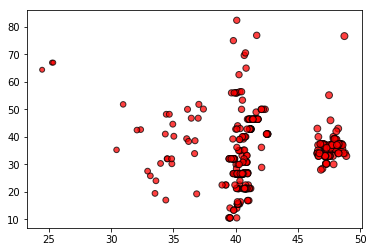

In [34]:
plt.scatter(latdata, tempdata, marker="o", facecolors="red", edgecolors="black",
            s=latdata, alpha=0.75)

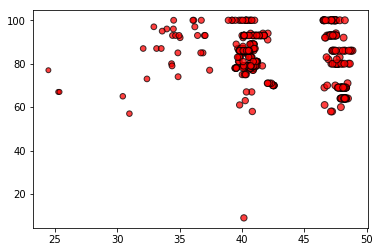

In [35]:
plt.scatter(latdata, humidity, marker="o", facecolors="red", edgecolors="black",
            s=latdata, alpha=0.75)

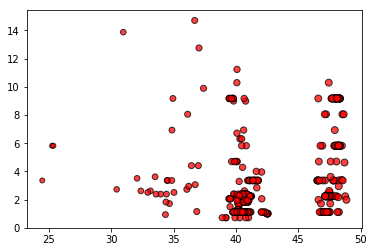

In [36]:
plt.scatter(latdata, windspeed, marker="o", facecolors="red", edgecolors="black",
            s=latdata, alpha=0.75)

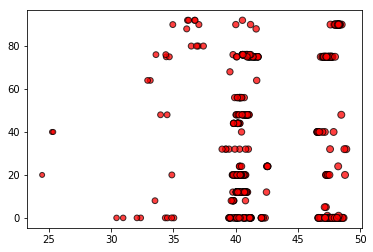

In [39]:
plt.scatter(latdata, cloudiness, marker="o", facecolors="red", edgecolors="black",
            s=latdata, alpha=0.75)